In [1]:
import laspy
import geopandas as gpd
from shapely.geometry import Point
import numpy as np


In [2]:
# Path to the .laz file
laz_file_path = 'SnowEx20_TLS_PC_BSU_SiteFL3B_01_31_2020_Snow.laz'

# Read the .laz file
las = laspy.read(laz_file_path)



In [19]:
lascut = las[0:1000000]

In [20]:
# Extract the coordinates
coords = np.vstack((lascut.x, lascut.y, lascut.z)).transpose()
print('coords done')

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    coords, 
    columns=['X', 'Y', 'Z'],
    geometry=[Point(x, y) for x, y in zip(lascut.x, lascut.y)]
)
print('gdf done')

# Set the coordinate reference system (CRS) if known, e.g., EPSG:4326
gdf.set_crs(epsg=4326, inplace=True)

print(gdf.head())

coords done
gdf done
              X          Y           Z                        geometry
0  225156.78125  4324274.5  3086.92500  POINT (225156.78125 4324274.5)
1  225156.85950  4324274.5  3086.93025   POINT (225156.8595 4324274.5)
2  225156.65625  4324274.5  3086.91575  POINT (225156.65625 4324274.5)
3  225156.54700  4324275.0  3086.91000      POINT (225156.547 4324275)
4  225156.64075  4324274.5  3086.91450  POINT (225156.64075 4324274.5)


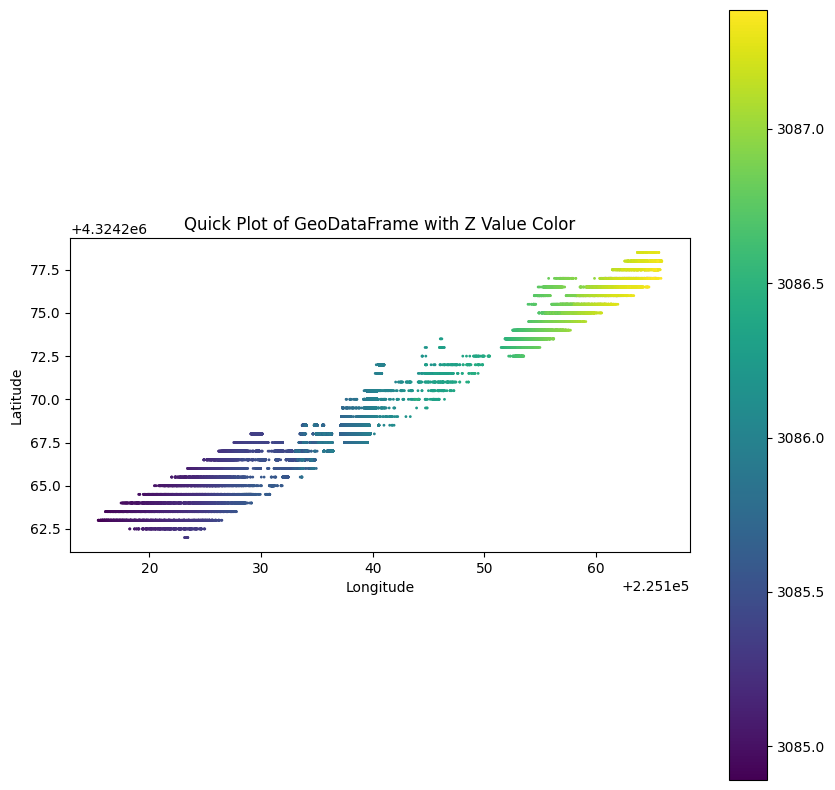

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='Z', cmap='viridis', legend=True, markersize=1, ax=ax)
plt.title('Quick Plot of GeoDataFrame with Z Value Color')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [23]:
import pandas as pd
SX = pd.read_csv('SNEX17_SD_Perm_GM_GPR_20170208_20170225_v01.0.csv')
SX.head()

,Date[mmddyy],Time[HHMMSS],Longitude[DD],Latitude[DD],ElevationWGS84[mae],Easting[m],Northing[m],UTM_Zone,TWT[ns],Depth[cm],SWE[mm],Density[kg m-3],Permittivity[unitless]
0,20817,NaN,-108.219267,39.031106,3036.8,221329.5,4325161.5,13,6.33,75.452361,227.249935,301.183331,1.573770
1,20817,NaN,-108.219266,39.031079,3036.8,221329.5,4325158.5,13,6.23,75.452361,227.249935,301.183331,1.573770
2,20817,NaN,-108.219240,39.031269,3037.3,221332.5,4325179.5,13,6.06,72.815643,217.601720,298.839250,1.568804
3,20817,NaN,-108.219238,39.031242,3037.3,221332.5,4325176.5,13,6.29,72.815643,217.601720,298.839250,1.568804
4,20817,NaN,-108.219231,39.031080,3036.7,221332.5,4325158.5,13,6.35,76.062713,229.088212,301.183331,1.573770


In [30]:
SX['Latitude[DD]']

0        39.031106
1        39.031079
2        39.031269
3        39.031242
4        39.031080
           ...    
10008    39.030073
10009    39.030046
10010    39.030182
10011    39.030155
10012    39.030101
Name: Latitude[DD], Length: 10013, dtype: float64

In [31]:
gdf = gpd.GeoDataFrame(
    SX, 
    geometry=gpd.points_from_xy(SX['Longitude[DD]'], SX['Latitude[DD]'])
)

gdf.head()

,Date[mmddyy],Time[HHMMSS],Longitude[DD],Latitude[DD],ElevationWGS84[mae],Easting[m],Northing[m],UTM_Zone,TWT[ns],Depth[cm],SWE[mm],Density[kg m-3],Permittivity[unitless],geometry
0,20817,NaN,-108.219267,39.031106,3036.8,221329.5,4325161.5,13,6.33,75.452361,227.249935,301.183331,1.573770,POINT (-108.21927 39.03111)
1,20817,NaN,-108.219266,39.031079,3036.8,221329.5,4325158.5,13,6.23,75.452361,227.249935,301.183331,1.573770,POINT (-108.21927 39.03108)
2,20817,NaN,-108.219240,39.031269,3037.3,221332.5,4325179.5,13,6.06,72.815643,217.601720,298.839250,1.568804,POINT (-108.21924 39.03127)
3,20817,NaN,-108.219238,39.031242,3037.3,221332.5,4325176.5,13,6.29,72.815643,217.601720,298.839250,1.568804,POINT (-108.21924 39.03124)
4,20817,NaN,-108.219231,39.031080,3036.7,221332.5,4325158.5,13,6.35,76.062713,229.088212,301.183331,1.573770,POINT (-108.21923 39.03108)


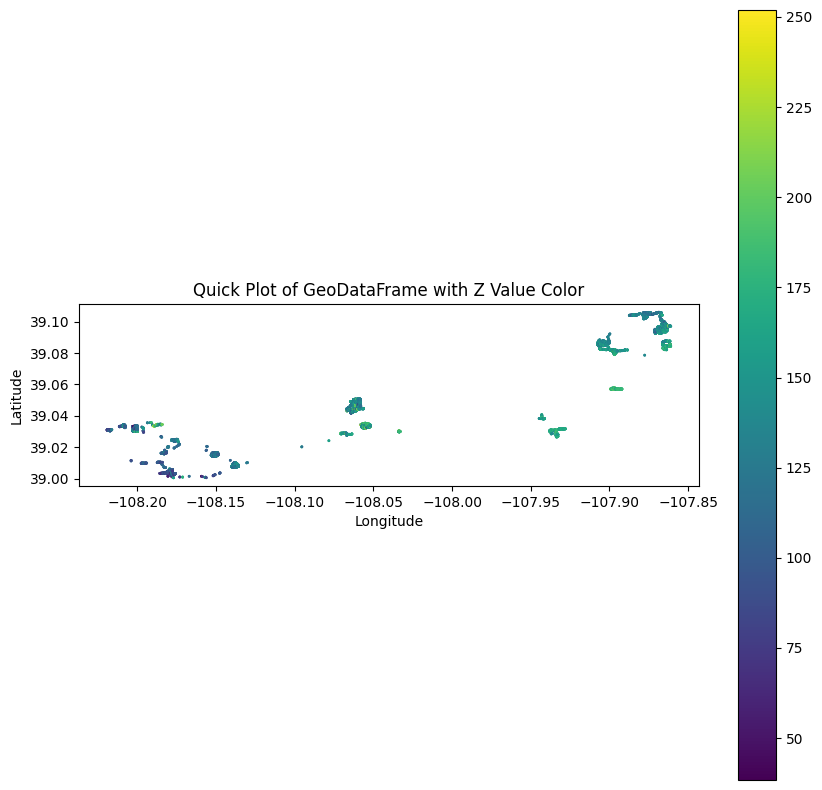

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='Depth[cm]', cmap='viridis', legend=True, markersize=1, ax=ax)
plt.title('Quick Plot of GeoDataFrame with Z Value Color')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [34]:
gdfcipped = gdf.cx[-107.92:-107.85, 39.07:39.12]
gdfcipped.head()

,Date[mmddyy],Time[HHMMSS],Longitude[DD],Latitude[DD],ElevationWGS84[mae],Easting[m],Northing[m],UTM_Zone,TWT[ns],Depth[cm],SWE[mm],Density[kg m-3],Permittivity[unitless],geometry
4263,21617,NaN,-107.907520,39.086003,3033.66,248515.5,4330345.5,13,11.66,143.863368,429.936630,298.850664,1.568828,POINT (-107.90752 39.086)
4264,21617,NaN,-107.907518,39.085976,3034.08,248515.5,4330342.5,13,12.18,145.767665,435.627634,298.850664,1.568828,POINT (-107.90752 39.08598)
4265,21617,NaN,-107.907517,39.085949,3034.33,248515.5,4330339.5,13,12.63,150.211024,456.845712,304.135941,1.580036,POINT (-107.90752 39.08595)
4266,21617,NaN,-107.907516,39.085922,3034.50,248515.5,4330336.5,13,12.73,150.211024,460.764104,306.744532,1.585582,POINT (-107.90752 39.08592)
4267,21617,NaN,-107.907515,39.085895,3034.50,248515.5,4330333.5,13,12.19,149.966884,462.119588,308.147757,1.588570,POINT (-107.90752 39.0859)


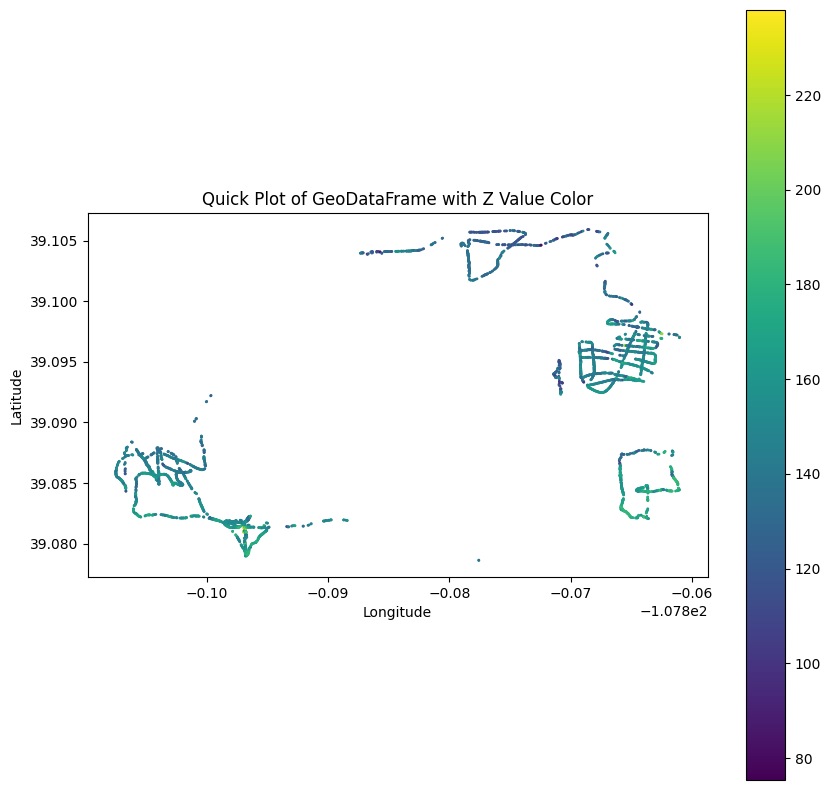

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdfcipped.plot(column='Depth[cm]', cmap='viridis', legend=True, markersize=1, ax=ax)
plt.title('Quick Plot of GeoDataFrame with Z Value Color')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()